## Exercise 1: Backward search for variable selection

AIC metric is used for implementing bacakward search for feature selection .
min AIC = −2logL + 2p    where L - loglikelihood and p - no of variables

I used the algorithm from ML lecture by Prof Niels Landwehr and the slides from the ML lecture of 2020 by Prof Lars to
implement this algorithm.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Downloads/bank.csv',  delimiter=";") #Read the required csv file and store it

In [2]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Converting any non-numeric values to numeric values
using hot-one encoding. Here we use the function get_dummies to create dummy features so as to divide the categorical values to each feature. Then we can represent it in binary format. So the number of columns increases. The target column also gets divided into 2 - y_yes and y_no. We need to take only one class as y since they are complimentary. Hence I used drop_first = True.


In [3]:
df = pd.get_dummies(df,drop_first = True) 
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df = df.dropna()
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


Splitting data set into train and test (80 % and 20 %)

In [5]:
# obtaining the train data set
df_train = df.groupby('y_yes', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state = 3116)) 

df_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
1688,38,-278,28,143,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
570,46,242,9,332,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1821,51,21244,4,166,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2331,37,1661,19,199,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2271,34,171,7,191,1,294,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,54,8295,5,207,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3088,31,2544,15,252,1,184,3,0,0,0,...,0,0,0,0,0,0,0,1,0,1
704,59,1033,11,1199,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2553,33,1064,13,562,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [6]:
train_index = df_train.index
df_test = df.drop(train_index) #dropping the training data to get test data
df_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6,36,307,14,341,1,330,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7,39,147,6,151,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
14,31,360,29,89,1,241,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16,56,4073,27,239,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,42,-91,5,43,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4507,33,288,17,306,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4511,46,668,15,1263,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:

# putting the target feature to y array 
y_train = np.array(df_train[['y_yes']])
x_train = np.array(df_train.drop(['y_yes'],axis =1))

y_test = np.array(df_test[['y_yes']]) 
x_test = np.array(df_test.drop(['y_yes'],axis =1))

print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)
print(x_train)

(3617, 1)
(3617, 42)
(904, 1)
(904, 42)
[[   38  -278    28 ...     0     0     1]
 [   46   242     9 ...     0     0     1]
 [   51 21244     4 ...     0     0     1]
 ...
 [   59  1033    11 ...     0     0     1]
 [   33  1064    13 ...     0     0     1]
 [   27   897     5 ...     0     0     1]]


##### Normalize (Standardize) the data using mean and standard deviation

In [8]:
mean = x_train.mean()

sd = x_train.std()

print(mean,sd)
x_train = (x_train - mean)/sd
x_train

42.38104453835723 518.5694289314073


array([[-8.44832783e-03, -6.17817069e-01, -2.77321487e-02, ...,
        -8.17268473e-02, -8.17268473e-02, -7.97984652e-02],
       [ 6.97872890e-03,  3.84941619e-01, -6.43714085e-02, ...,
        -8.17268473e-02, -8.17268473e-02, -7.97984652e-02],
       [ 1.66206394e-02,  4.08848223e+01, -7.40133189e-02, ...,
        -8.17268473e-02, -8.17268473e-02, -7.97984652e-02],
       ...,
       [ 3.20476961e-02,  1.91029185e+00, -6.05146443e-02, ...,
        -8.17268473e-02, -8.17268473e-02, -7.97984652e-02],
       [-1.80902383e-02,  1.97007170e+00, -5.66578801e-02, ...,
        -8.17268473e-02, -8.17268473e-02, -7.97984652e-02],
       [-2.96605308e-02,  1.64803189e+00, -7.20849369e-02, ...,
        -8.17268473e-02, -8.17268473e-02, -7.97984652e-02]])

In [9]:

x_test = (x_test - mean)/sd
x_test

array([[ 0.0320477 , -0.08172685, -0.07208494, ..., -0.08172685,
        -0.08172685, -0.07979847],
       [-0.01230509,  0.51028645, -0.0547295 , ..., -0.07979847,
        -0.08172685, -0.08172685],
       [-0.00651995,  0.20174532, -0.07015655, ..., -0.08172685,
        -0.08172685, -0.07979847],
       ...,
       [ 0.00697873,  1.20643239, -0.05280112, ..., -0.08172685,
        -0.08172685, -0.07979847],
       [-0.01809024, -0.72387808, -0.02387538, ..., -0.08172685,
        -0.08172685, -0.07979847],
       [-0.02773215,  2.11084359, -0.07015655, ..., -0.07979847,
        -0.08172685, -0.08172685]])

In [10]:
#Function to find the log loss - implementation from lab4
def logloss1(y,y_predicted,beta):
   
    return (y*np.log(y_predicted) + (1-y)*np.log(1-y_predicted)).mean() 


#### Function to implement logistic regression and mini-batch Gradient Ascent.

In [11]:

#Equations for y_prediction, log liklihood and beta taken from lab4

def logReg_miniGA(x_train,y_train,x_test,y_test,mu,imax):
    
    batch_size = 50                    #fixing batch size
    beta = np.zeros(x_train.shape[1]).reshape(-1,1) #Initializing beta values
    log_list_train = []
    log_list_test = []
    check_list = []
    max_check = 0
    
    for i in range(imax): #epoch 
        
        
        pdt = np.dot(x_train,beta)
        log = np.sum(np.dot(y_train.T,pdt)-np.log(1+ (np.exp(pdt)))) # Eqn of log likelikhood taken from algorithm
        
        #Finding initial y value 
        y_hat_prev = 1/(1+np.exp(-np.dot(x_train,beta)))

        for j in range((len(x_train)//batch_size)):#Loop for iterating through each batch of x for mini batch gradient ascent
            
            x_batch = x_train[j*batch_size:min((j+1)*batch_size,len(x_train))] #Defining a subset of x with size 50
            y_batch = y_train[j*batch_size:min((j+1)*batch_size,len(y_train))] #Defining a subset of y with size 50
            
            y_predicted = 1/(1+np.exp(-np.dot(x_batch,beta)))    #predicting y for one batch of x
            
            
            beta = beta + mu * ((np.dot(x_batch.T,(y_batch - y_predicted))//len(x_batch))) # Finding beta for logistic regression
            
            y_predicted = 1/(1+np.exp(-np.dot(x_batch,beta))) # predicting y for new beta
            
            
            #Finding logloss for particular batch with current beta for train and test set
            log_loss = logloss1(y_batch,y_predicted,beta)
            log_list_train.append(-log_loss) #appending loss 
            
            y_predicted_test = 1/(1+np.exp(-np.dot(x_test,beta)))
            
            log_loss_test = -logloss1(y_test,y_predicted_test,beta)
            log_list_test.append(log_loss_test)
            
           
            
        # Loop of iterating if the total number of data cannot be perfectly divided into batches of size 50    
        if((len(x_train)%batch_size)>0):  #Remainder of elements will be taken and stored as a batch (size<50)
            x_batch = x_train[len(x_train)//batch_size*batch_size:,] 
            y_batch = y_train[len(y_train)//batch_size*batch_size:,]
            
            y_predicted = 1/(1+np.exp(-np.dot(x_batch,beta)))    #predicting y 
            
            
            beta = beta + mu * ((np.dot(x_batch.T,(y_batch - y_predicted))//len(x_batch))  )
            
            y_predicted = 1/(1+np.exp(-np.dot(x_batch,beta)))
            #print(y_batch.shape,y_predicted.shape)
            log_loss = -logloss1(y_batch,y_predicted,beta)
            log_list_train.append(log_loss)
            
            y_predicted_test = 1/(1+np.exp(-np.dot(x_test,beta)))
            
            log_loss_test = -logloss1(y_test,y_predicted_test,beta)
            log_list_test.append(log_loss_test)
            
            
    return min(log_list_train),min(log_list_test) # Returning the min losses after iterations
            

#### Keep the hyperparameters of learning rate and batch size fixed (0.01 and 50) and iteratively do backward selection keeping track of the AIC metric


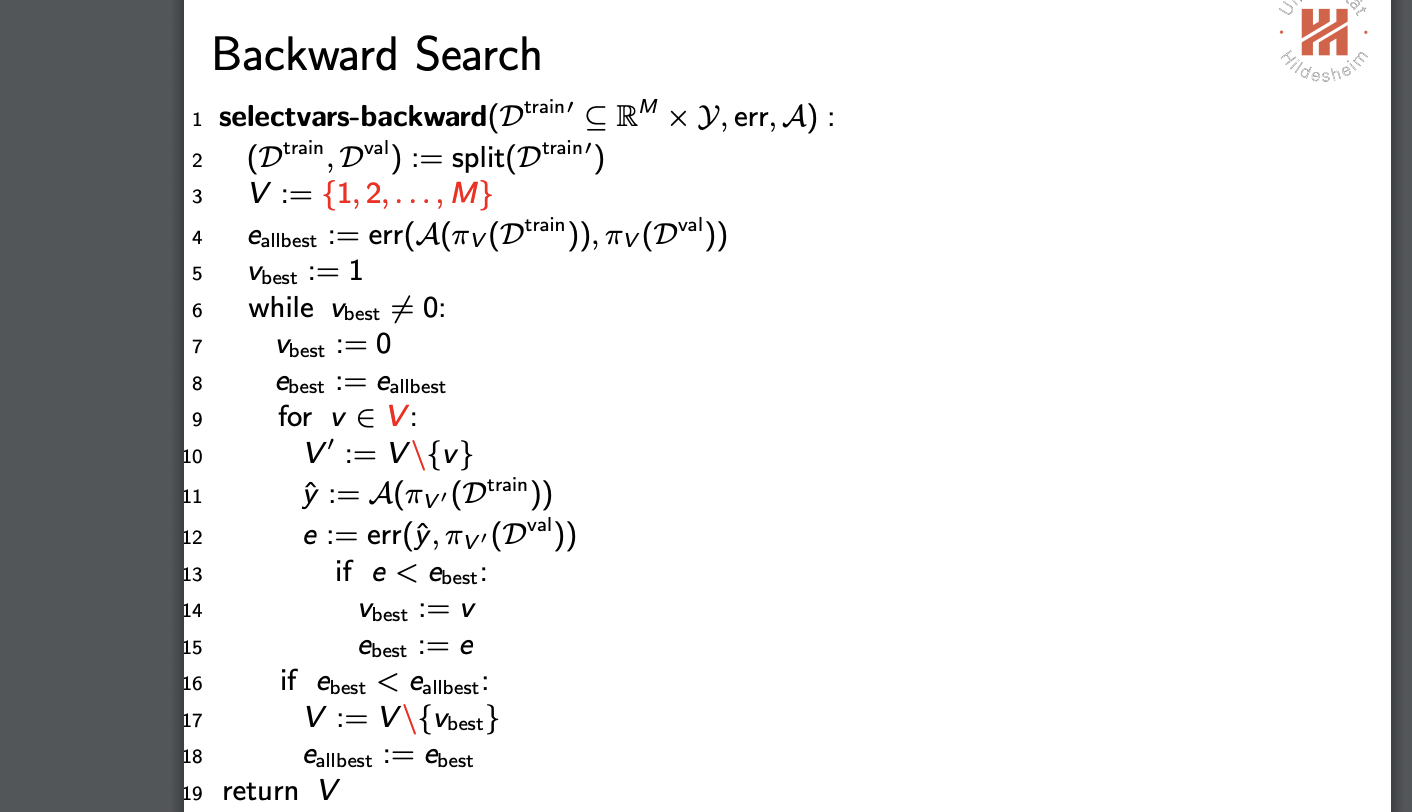

In [12]:
def backward_search(x_train,y_train,x_test,y_test,mu,imax):
    features = np.arange(42) # total number of variables or features in set
    #print(features)
    
    f_used = features.copy() #copy for using
    
    #Calculating the aic metric for the entire dataset - 42 features
    loss_train,loss_test = logReg_miniGA(x_train,y_train,x_test,y_test,mu,imax) 
    #Aic_train = -2*np.log(loss_train)+2*len(f_used)
    Aic_test = 2*(loss_test)+(2*len(f_used)) #given
    e_allbest = Aic_test

    print("Initial aic-",Aic_test)
    for i in range(len(features)-1):  #To iterate through all features
        f_best = 100
                
        for k in range(0,len(f_used)): #To delete each feature from current set and check
            #print(k,f_used)
            f_dash = np.delete(f_used,k)   # delete one feature from current set
            x_train_new = x_train[:,f_dash] # create x_train and x_test data with new number of features
            x_test_new = x_test[:,f_dash]
            
            #calculating the aic metric with the new number of features
            loss_train,loss_test = logReg_miniGA(x_train_new,y_train,x_test_new,y_test,mu,imax)
            Aic_test = 2*(loss_test)+(2*len(f_dash))
            #print("ebest",e_allbest,"aic",Aic_test,"losstest",loss_test)

# if aic metric is lesser than earlier metric then the newly deleted feature has to be removed from the original set
            if(Aic_test < e_allbest):   
                f_best = k
                #print("Hi",Aic_test)
                e_allbest = Aic_test
        if f_best != 100:
            #print(f_best)
            f_used = np.delete(f_used,f_best) # removing the features to get less aic metric
        
    return f_used
                

In [13]:
print("The optimal columns -",backward_search(x_train,y_train,x_test,y_test,0.01,10))



Initial aic- 85.21200806180161
The optimal columns - [1]


In [14]:
x_train_new = x_train[:,[1]] # New x train and xtest
x_test_new = x_test[:,[1]]
loss_train,loss_test = logReg_miniGA(x_train_new,y_train,x_test_new,y_test,0.01,10)
Aic_test = 2*(loss_test)+(2) # aic metric with optimum variables selected

print("Final error on test set-", loss_test)
print("Final aic on test set-", Aic_test)


Final error on test set- 0.6145425197250594
Final aic on test set- 3.2290850394501187


We observe that the aic metric and error has decreased by implementing variable selection method. 

### References

https://www.datasklr.com/ols-least-squares-regression/variable-selection
https://www.analyticsvidhya.com/blog/2021/04/backward-feature-elimination-and-its-implementation/
https://www.ismll.uni-hildesheim.de/lehre/ml-20w/script/index.html